> 식품

In [1]:
dataset=[
    ['사과','치즈','생수'],
    ['생수','호두','치즈','고등어'],
    ['수박','사과','생수'],
    ['생수','호두','치즈','옥수수']
]

In [2]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

#트랜잭션 자료형으로 변환
#x축 전체품목, y축 거래아이디(한장의 영수증)
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [3]:
#선험적 알고리즘 support >0.5 이상
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(생수, 사과)"
5,0.75,"(생수, 치즈)"
6,0.50,"(생수, 호두)"
7,0.50,"(치즈, 호두)"
8,0.50,"(생수, 치즈, 호두)"


In [4]:
#confidence > 0.3(기본값 0.8)
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)
rules
# lift 연관성 : 1(연관x), 1보다 크면 양의 상관관계, 작으면 음의 상관관계

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,0.0
1,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
2,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0,0.0
3,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf,0.0
4,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,0.0
5,(호두),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
6,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5,1.0
7,(호두),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf,0.5
8,"(생수, 치즈)",(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5,1.0
9,"(생수, 호두)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf,0.5


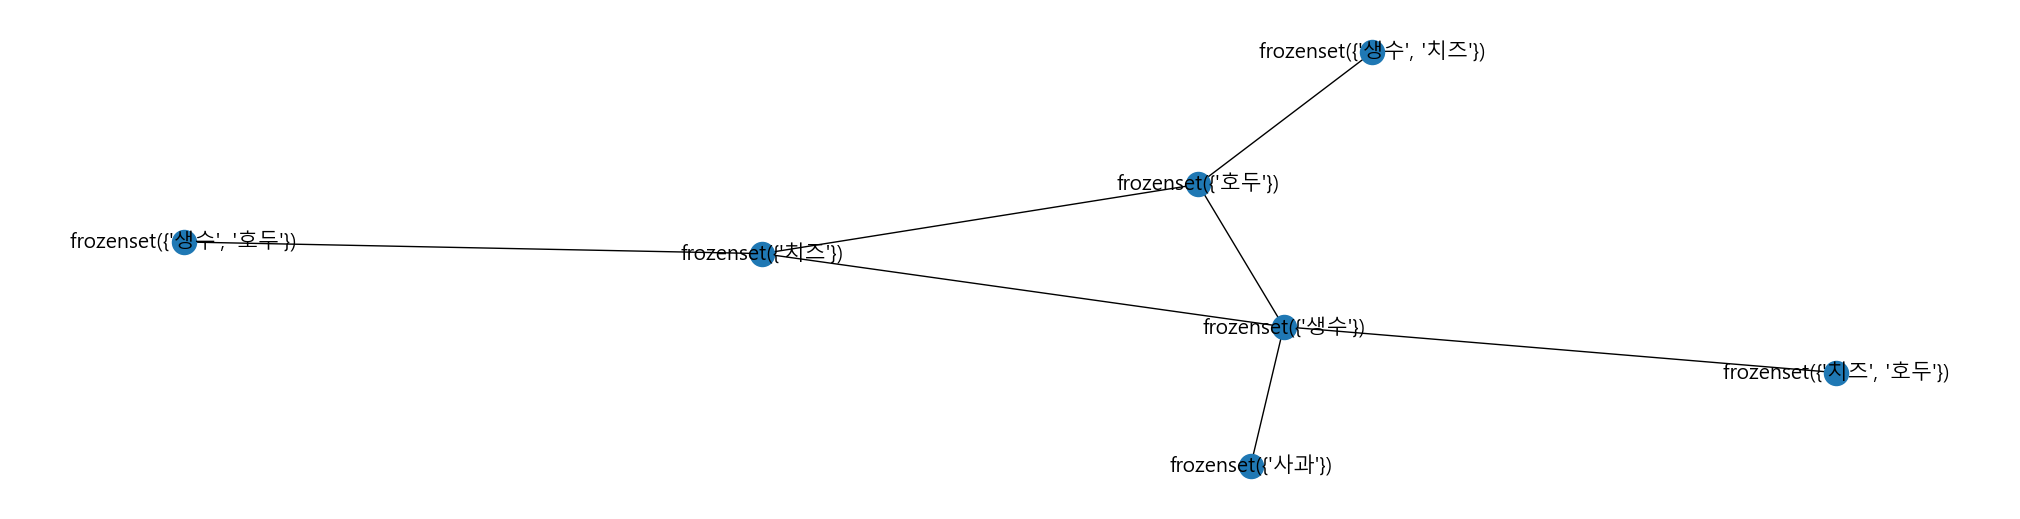

In [5]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import networkx as nx
# antecedents 선행(~라면), consequents 결과(~이다)
ga = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
plt.figure(figsize=(20,5))
nx.draw(ga, with_labels=True, font_family=font_name, font_size=15)
# source(그래프의 안쪽 노드들), target(그래프의 바깥쪽 노드들)

> dvd 대여

In [6]:
df=pd.read_csv('c:/vscode/data/basket/dvdtrans.csv')

In [7]:
#2차원 리스트로 읽기
items = []
for row in range(0, df.shape[0]):
    items.append([df.iloc[row,0],str(df.iloc[row,1])])
print(items)

[[1, 'Sixth Sense'], [1, 'LOTR1'], [1, 'Harry Potter1'], [1, 'Green Mile'], [1, 'LOTR2'], [2, 'Gladiator'], [2, 'Patriot'], [2, 'Braveheart'], [3, 'LOTR1'], [3, 'LOTR2'], [4, 'Gladiator'], [4, 'Patriot'], [4, 'Sixth Sense'], [5, 'Gladiator'], [5, 'Patriot'], [5, 'Sixth Sense'], [6, 'Gladiator'], [6, 'Patriot'], [6, 'Sixth Sense'], [7, 'Harry Potter1'], [7, 'Harry Potter2'], [8, 'Gladiator'], [8, 'Patriot'], [9, 'Gladiator'], [9, 'Patriot'], [9, 'Sixth Sense'], [10, 'Sixth Sense'], [10, 'LOTR'], [10, 'Gladiator'], [10, 'Green Mile']]


In [8]:
# 전처리 (아이디별 구매목록으로)
result = []
for i in range(1,11):
    row = []
    for item in items:
        if item[0]==i:
            row.append(item[1])
    result.append(row)
print(result)

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'], ['Gladiator', 'Patriot', 'Braveheart'], ['LOTR1', 'LOTR2'], ['Gladiator', 'Patriot', 'Sixth Sense'], ['Gladiator', 'Patriot', 'Sixth Sense'], ['Gladiator', 'Patriot', 'Sixth Sense'], ['Harry Potter1', 'Harry Potter2'], ['Gladiator', 'Patriot'], ['Gladiator', 'Patriot', 'Sixth Sense'], ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile']]


In [9]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
te = TransactionEncoder()
t_arr = te.fit(result).transform(result)
print(te.columns_)
print(t_arr)

['Braveheart', 'Gladiator', 'Green Mile', 'Harry Potter1', 'Harry Potter2', 'LOTR', 'LOTR1', 'LOTR2', 'Patriot', 'Sixth Sense']
[[False False  True  True False False  True  True False  True]
 [ True  True False False False False False False  True False]
 [False False False False False False  True  True False False]
 [False  True False False False False False False  True  True]
 [False  True False False False False False False  True  True]
 [False  True False False False False False False  True  True]
 [False False False  True  True False False False False False]
 [False  True False False False False False False  True False]
 [False  True False False False False False False  True  True]
 [False  True  True False False  True False False False  True]]


In [11]:
df2 = pd.DataFrame(t_arr, columns=te.columns_)
df2

,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,False,False,True,True,False,False,True,True,False,True
1,True,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,True,False,False
3,False,True,False,False,False,False,False,False,True,True
4,False,True,False,False,False,False,False,False,True,True
5,False,True,False,False,False,False,False,False,True,True
6,False,False,False,True,True,False,False,False,False,False
7,False,True,False,False,False,False,False,False,True,False
8,False,True,False,False,False,False,False,False,True,True
9,False,True,True,False,False,True,False,False,False,True


In [12]:
from mlxtend.frequent_patterns import apriori
frequent = apriori(df2, min_support=0.2, use_colnames=True)
frequent

,support,itemsets
0,0.7,(Gladiator)
1,0.2,(Green Mile)
2,0.2,(Harry Potter1)
3,0.2,(LOTR1)
4,0.2,(LOTR2)
5,0.6,(Patriot)
6,0.6,(Sixth Sense)
7,0.6,"(Gladiator, Patriot)"
8,0.5,"(Gladiator, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [13]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent, metric='confidence', min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
2,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
3,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
9,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


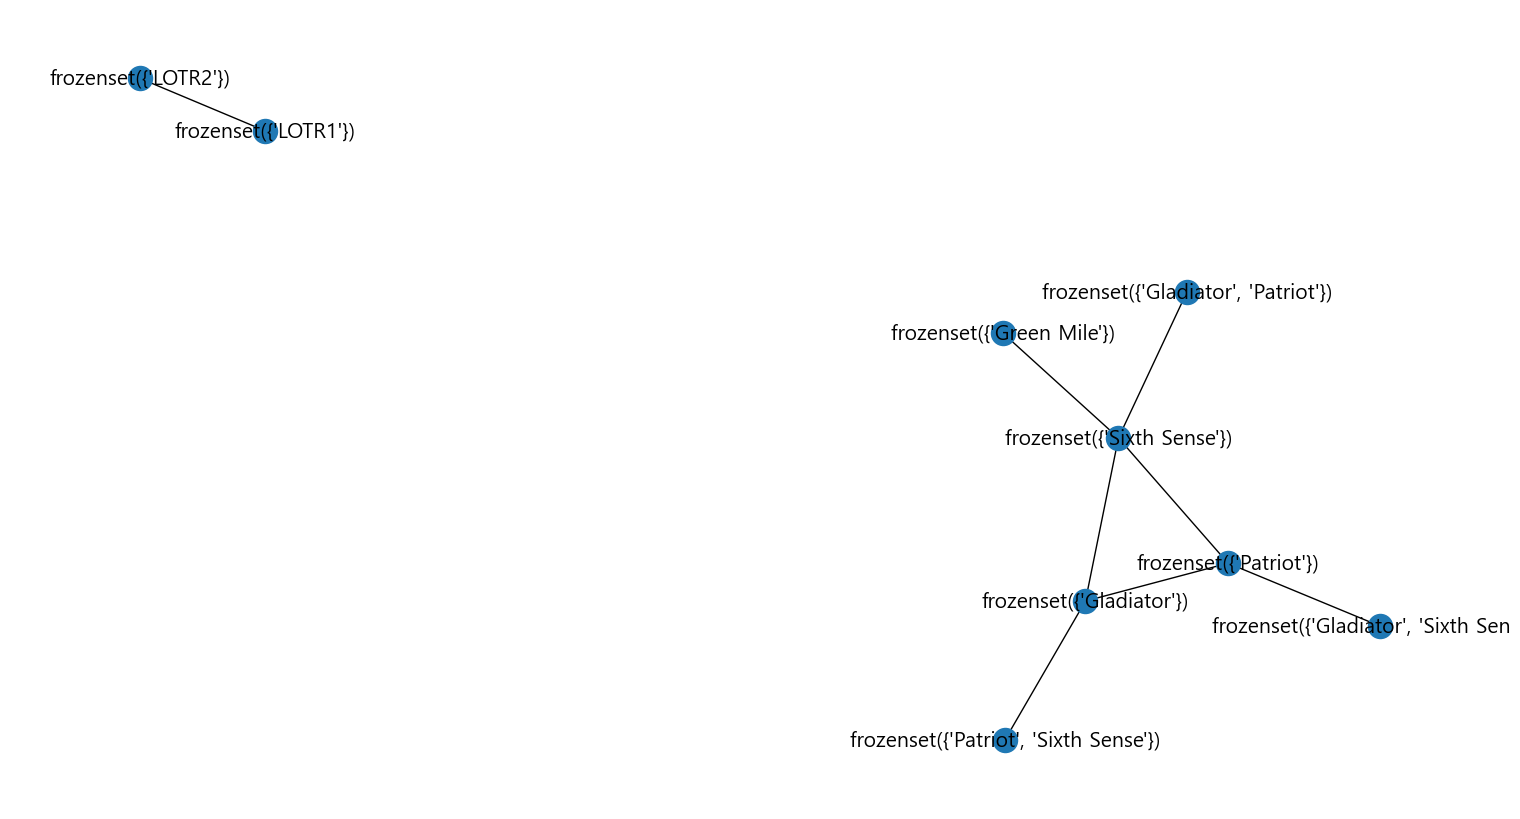

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
ga = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
plt.figure(figsize=(15,8))
nx.draw(ga, with_labels=True, font_family=font_name, font_size=15)

> market

In [22]:
import pandas as pd
df = pd.read_csv("c:/vscode/data/market.csv", sep=';')
df.head(2)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12380\835679421.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("c:/vscode/data/market.csv", sep=';')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [23]:
#전처리
df["Price"] = df["Price"].str.replace(",",".")
df["Price"] = df["Price"].astype("float64")

# 오늘 날짜라고 가정
today = "2012-01-01"
today = pd.to_datetime(today)
df["Date"] = pd.to_datetime(df["Date"])
df.head(2)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [24]:
# RFM 분석
# Recency 최근성
# Frequency 구매 빈도
# Monetary 구매 금액
#최근 구매일자
rec_table = df.groupby(['CustomerID']).agg({'Date':lambda x:((today-x.max()).days)})
rec_table.columns = ['Recency']
rec_table.head(2)

,Recency
CustomerID,
12346.0,347
12347.0,61


In [25]:
#구매횟수
freq_table = df.drop_duplicates(subset='BillNo').groupby(['CustomerID'])[['BillNo']].count()
freq_table.columns = ['Frequency']
freq_table.head(2)

,Frequency
CustomerID,
12346.0,1
12347.0,7


In [26]:
#구매금액
df["Total_Price"] = df["Quantity"] * df["Price"]
df.head(2)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total_Price
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [27]:
#고객별 구매금액합계
monetary_table = df.groupby(["CustomerID"])[["Total_Price"]].sum()
monetary_table.columns = ["Monetary"]
monetary_table.head()

,Monetary
CustomerID,
12346.0,77183.60
12347.0,4310.00
12349.0,1757.55
12350.0,334.40
12352.0,2506.04


In [28]:
#rfm 데이터 정리
rfm_data = pd.concat([rec_table, freq_table, monetary_table], axis = 1)
rfm_data.head(2)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.6
12347.0,61,7,4310.0


In [29]:
#스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

Text(0.5, 1.0, 'KMeans - Elbow')

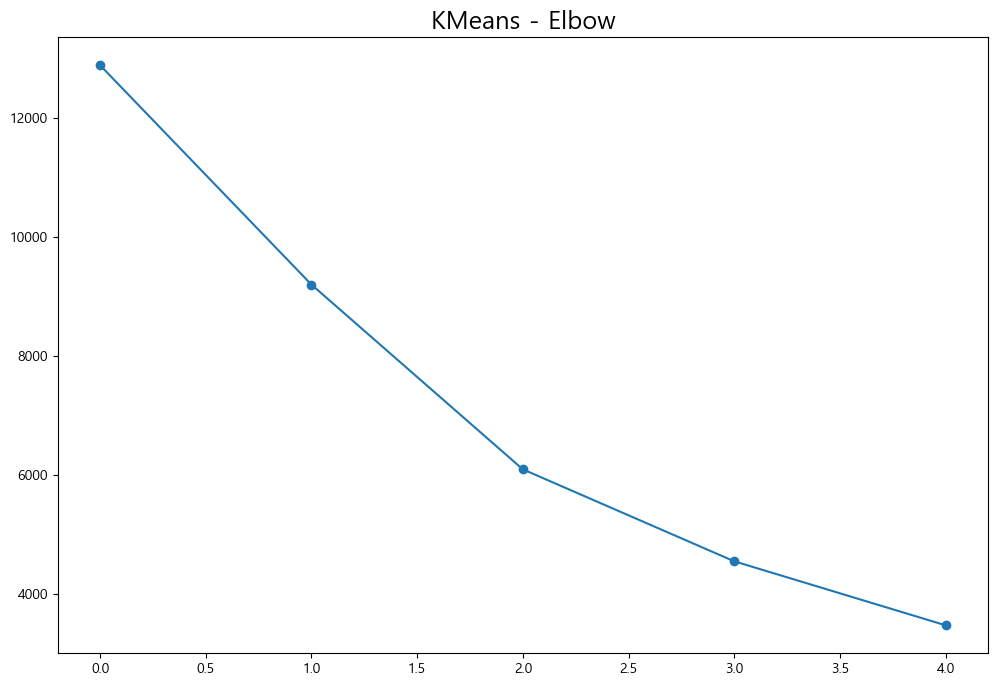

In [30]:
import matplotlib.pyplot as plt
import numpy as np

inertia = []
from sklearn.cluster import KMeans
for i in np.arange(1,6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize = (12,8))
plt.plot(inertia, marker = "o")
plt.title("KMeans - Elbow", fontsize = 18)
#엘보우 포인트 : 3

In [31]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_scaled)
rfm_data['Cluster_No'] = (kmeans.labels_ +1)
rfm_data.head(2)

,Recency,Frequency,Monetary,Cluster_No
CustomerID,,,,
12346.0,347,1,77183.6,1
12347.0,61,7,4310.0,3


In [32]:
#군집별 RFM 확인
rfm_data.groupby(["Cluster_No"])[["Recency", "Frequency","Monetary"]].mean()

# 클러스터1: 프리미엄 고객, 구매금액이 크고 최근에 구매한 이력이 있음.
# 클러스터2: 최근 구매일자 이력이 없는 고객, 마케팅이 필요함
# 클러스터3: 중간 레벨의 고객

,Recency,Frequency,Monetary
Cluster_No,,,
1,48.760000,58.960000,81979.682000
2,281.745299,1.545299,495.484189
3,68.634429,4.797872,1913.384218


c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


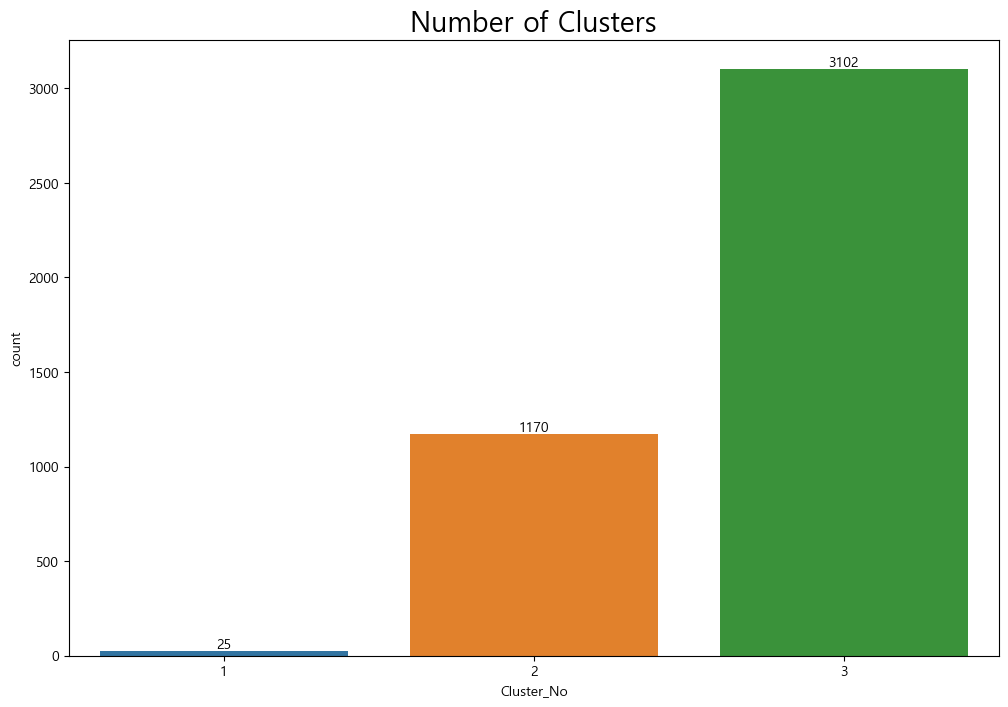

In [33]:
import seaborn as sns
plt.figure(figsize = (12,8))
ax = sns.countplot(rfm_data.Cluster_No)
plt.title("Number of Clusters", fontsize = 20);
for bars in ax.containers:
    ax.bar_label(bars)

In [34]:
data_apr = df.groupby(['BillNo', 'Itemname'])[["Quantity"]].sum().unstack().reset_index().fillna(0).set_index("BillNo")
            # unstack() 좌에서 우로 쌓아감
data_apr.head(2)

Quantity                                                 \
Itemname *Boombox Ipod Classic *USB Office Mirror Ball 10 COLOUR SPACEBOY PEN   
BillNo                                                                          
536365                     0.0                     0.0                    0.0   
536366                     0.0                     0.0                    0.0   

                                                               \
Itemname 12 COLOURED PARTY BALLOONS 12 DAISY PEGS IN WOOD BOX   
BillNo                                                          
536365                          0.0                       0.0   
536366                          0.0                       0.0   

                                                                 \
Itemname 12 EGG HOUSE PAINTED WOOD 12 HANGING EGGS HAND PAINTED   
BillNo                                                            
536365                         0.0                          0.0   
536366                         0.0                          0.0   

                                                                           \
Itemname 12 IVORY ROSE PEG PLACE SETTINGS 12 MESSAGE CARDS WITH ENVELOPES   
BillNo                                                                      
536365                                0.0                             0.0   
536366                                0.0                             0.0   

                                        ...                      \
Itemname 12 PENCIL SMALL TUBE WOODLAND  ... wrongly coded 20713   
BillNo                                  ...                       
536365                             0.0  ...                 0.0   
536366                             0.0  ...                 0.0   

                                                                 \
Itemname wrongly coded 23343 wrongly coded-23343 wrongly marked   
BillNo                                                            
536365                   0.0                 0.0            0.0   
536366                   0.0                 0.0            0.0   

                                                           \
Itemname wrongly marked 23343 wrongly marked carton 22804   
BillNo                                                      
536365                    0.0                         0.0   
536366                    0.0                         0.0   

                                                                    \
Itemname wrongly marked. 23343 in box wrongly sold (22719) barcode   
BillNo                                                               
536365                            0.0                          0.0   
536366                            0.0                          0.0   

                                                 
Itemname wrongly sold as sets wrongly sold sets  
BillNo                                           
536365                    0.0               0.0  
536366                    0.0               0.0  

[2 rows x 4185 columns]

In [35]:
def num(x):
    if x <= 0:
        return 0
    elif x >= 1:
        return 1

basket_new = data_apr.applymap(num)
basket_new.nunique()

          Itemname                    
Quantity  *Boombox Ipod Classic           2
          *USB Office Mirror Ball         2
          10 COLOUR SPACEBOY PEN          2
          12 COLOURED PARTY BALLOONS      2
          12 DAISY PEGS IN WOOD BOX       2
                                         ..
          wrongly marked carton 22804     1
          wrongly marked. 23343 in box    1
          wrongly sold (22719) barcode    2
          wrongly sold as sets            1
          wrongly sold sets               1
Length: 4185, dtype: int64

In [36]:
from mlxtend.frequent_patterns import apriori
apr = apriori(basket_new, min_support = 0.02, use_colnames =True)
apr.sort_values(by = "support", ascending = False)

,support,itemsets
263,0.108956,"((Quantity, WHITE HANGING HEART T-LIGHT HOLDER))"
97,0.102128,"((Quantity, JUMBO BAG RED RETROSPOT))"
190,0.094211,"((Quantity, REGENCY CAKESTAND 3 TIER))"
151,0.081940,"((Quantity, PARTY BUNTING))"
122,0.076249,"((Quantity, LUNCH BAG RED RETROSPOT))"
...,...,...
274,0.020139,"((Quantity, WOODEN UNION JACK BUNTING))"
245,0.020139,"((Quantity, STRAWBERRY SHOPPER BAG))"
219,0.020139,"((Quantity, SET OF 60 I LOVE LONDON CAKE CASES))"
195,0.020040,"((Quantity, RIBBON REEL STRIPES DESIGN))"


In [37]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(apr, metric = "lift", min_threshold =1)
rules.sort_values(by = "confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
154,"((Quantity, PINK REGENCY TEACUP AND SAUCER), (...","((Quantity, GREEN REGENCY TEACUP AND SAUCER))",0.028204,0.048243,0.025482,0.903509,18.728115,0.024122,9.863659,0.974077
152,"((Quantity, GREEN REGENCY TEACUP AND SAUCER), ...","((Quantity, ROSES REGENCY TEACUP AND SAUCER))",0.029936,0.050124,0.025482,0.851240,16.982778,0.023982,6.385280,0.970159
25,"((Quantity, PINK REGENCY TEACUP AND SAUCER))","((Quantity, GREEN REGENCY TEACUP AND SAUCER))",0.036418,0.048243,0.029936,0.822011,17.038810,0.028179,5.347273,0.976886
160,"((Quantity, JUMBO STORAGE BAG SUKI), (Quantity...","((Quantity, JUMBO BAG RED RETROSPOT))",0.025433,0.102128,0.020386,0.801556,7.848573,0.017789,4.524572,0.895360
138,"((Quantity, PINK REGENCY TEACUP AND SAUCER))","((Quantity, ROSES REGENCY TEACUP AND SAUCER))",0.036418,0.050124,0.028204,0.774457,15.450905,0.026378,4.211500,0.970627
...,...,...,...,...,...,...,...,...,...,...
70,"((Quantity, JUMBO BAG RED RETROSPOT))","((Quantity, JUMBO STORAGE BAG SKULLS))",0.102128,0.034785,0.020435,0.200097,5.752430,0.016883,1.206665,0.920131
161,"((Quantity, JUMBO BAG RED RETROSPOT))","((Quantity, JUMBO STORAGE BAG SUKI), (Quantity...",0.102128,0.025433,0.020386,0.199612,7.848573,0.017789,1.217619,0.971840
42,"((Quantity, JUMBO BAG RED RETROSPOT))","((Quantity, JUMBO BAG ALPHABET))",0.102128,0.043790,0.020336,0.199128,4.547316,0.015864,1.193961,0.868821
130,"((Quantity, WHITE HANGING HEART T-LIGHT HOLDER))","((Quantity, NATURAL SLATE HEART CHALKBOARD))",0.108956,0.060960,0.020336,0.186649,3.061823,0.013695,1.154532,0.755740


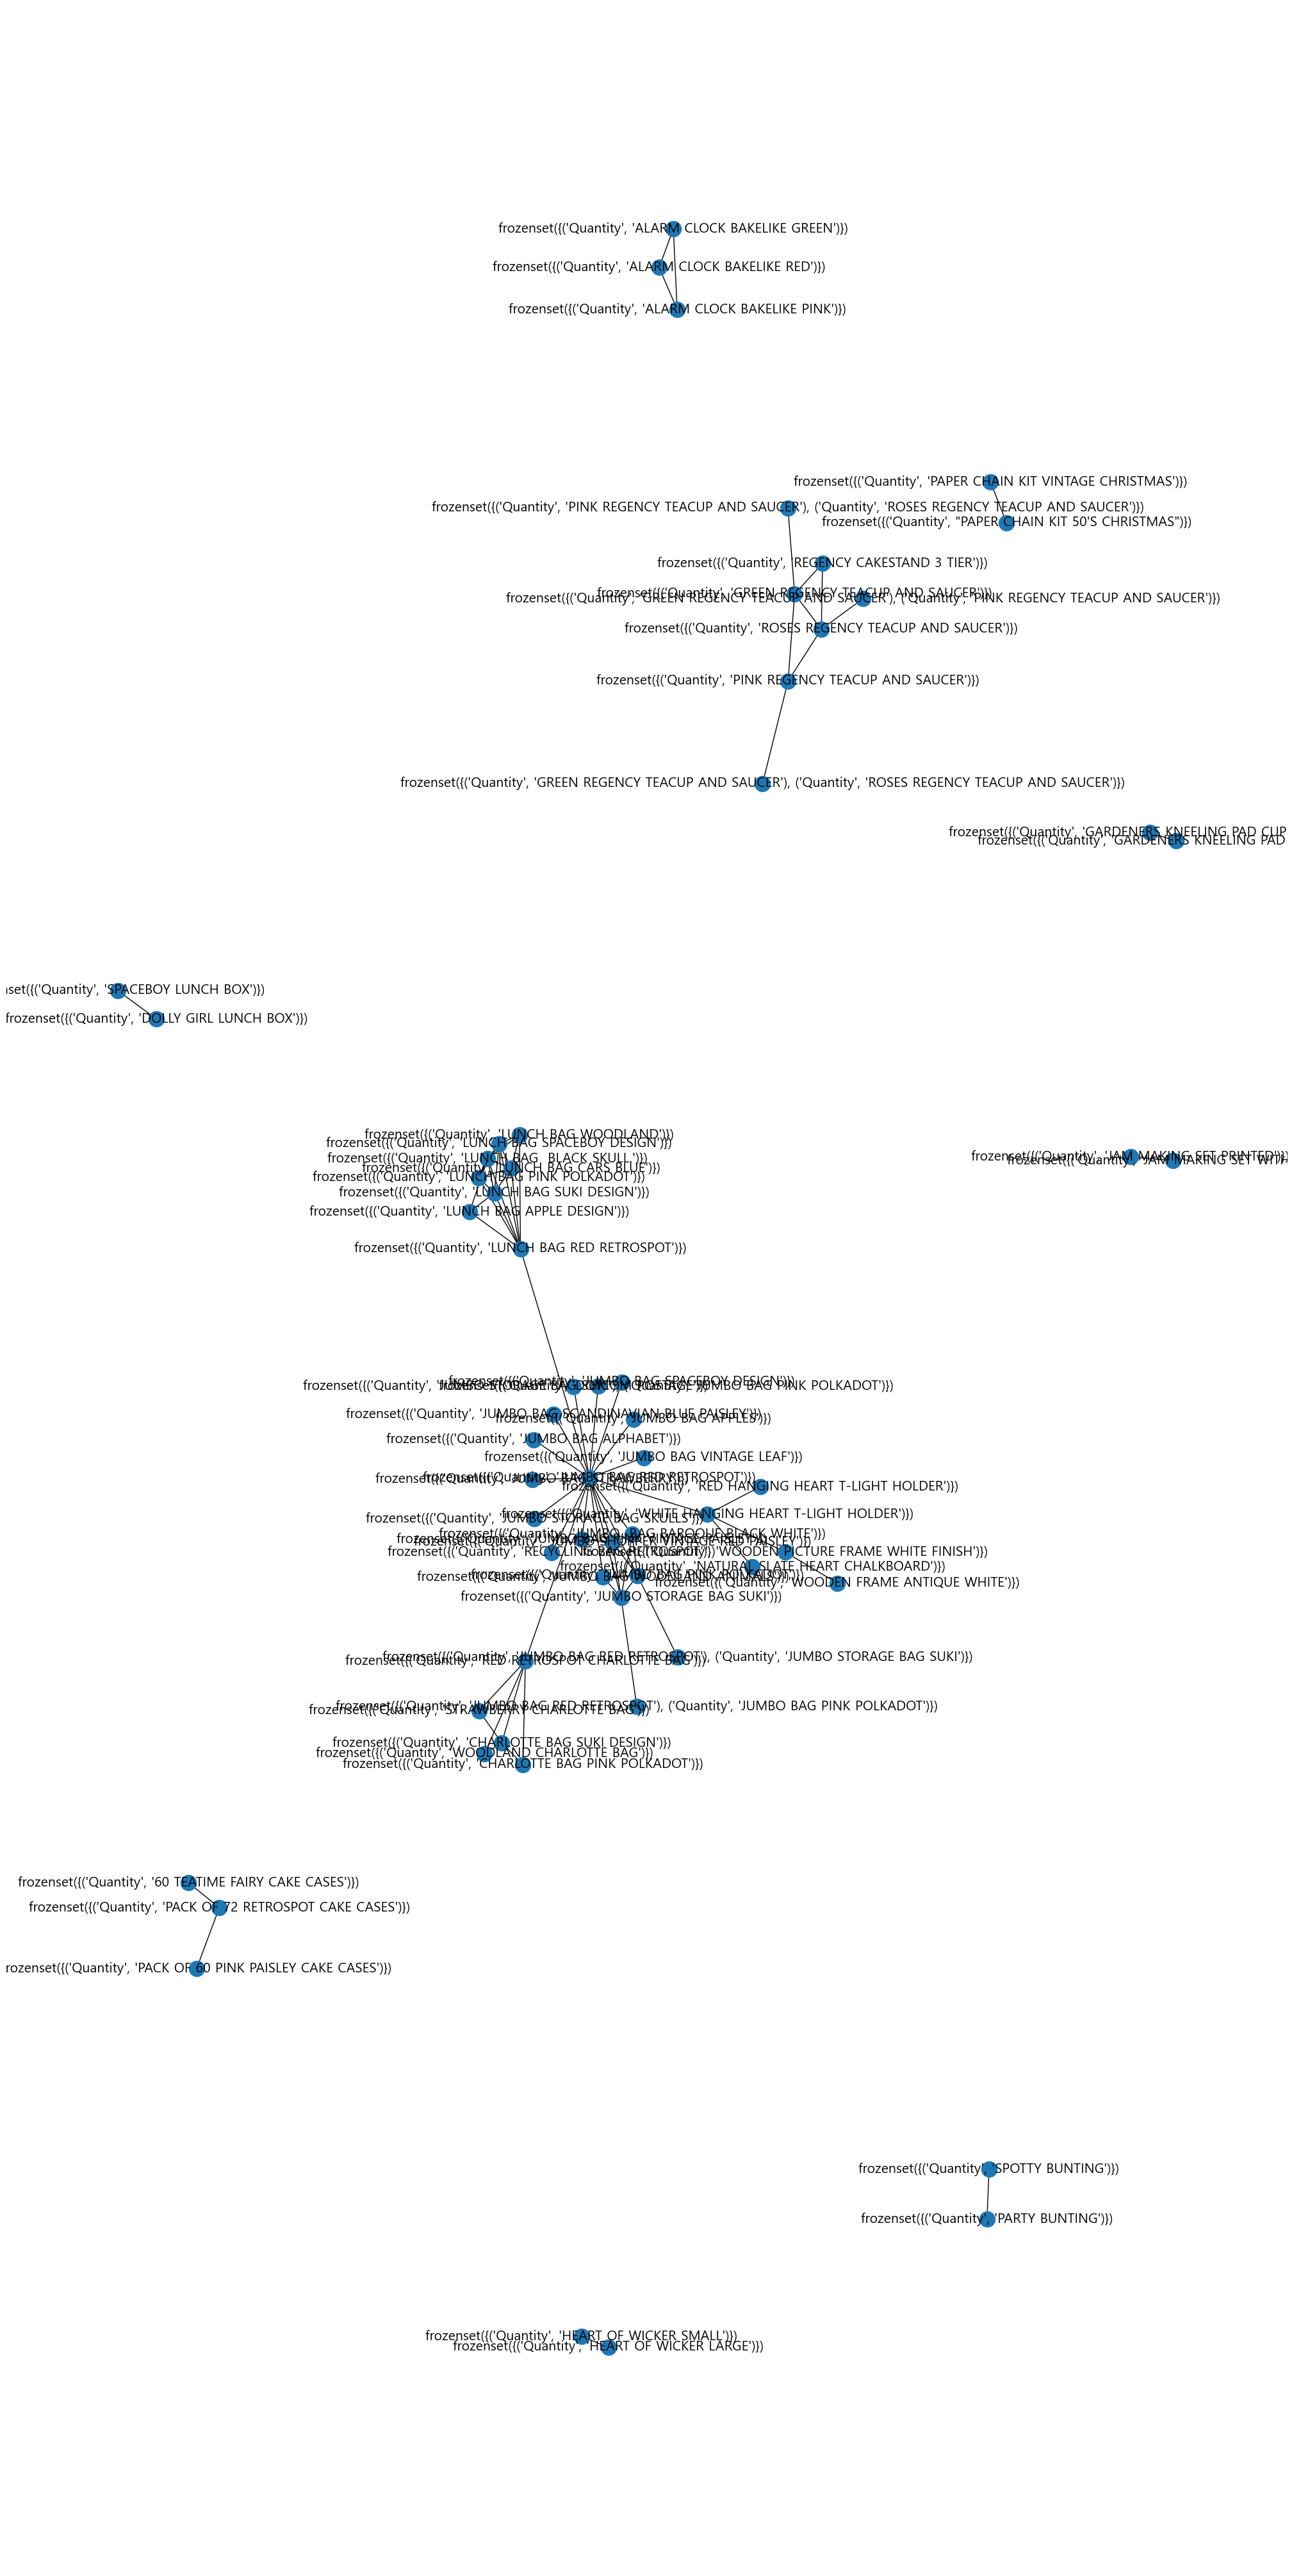

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font',family=font_name)

plt.figure(figsize=(20,40))
ga=nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
nx.draw(ga, with_labels=True, font_family=font_name, font_size=15)